Importare i dati da yfinance

In [1]:
import pandas as pd
import yfinance as yf
df = yf.download('AAPL', start='2020-01-01')
print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.960457   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.251152   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.826859   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.484344   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.650360   
...                ...         ...         ...         ...         ...   
2024-06-26  211.500000  214.860001  210.639999  213.250000  213.250000   
2024-06-27  214.690002  215.740005  212.350006  214.100006  214.100006   
2024-06-28  215.770004  216.070007  210.300003  210.619995  210.619995   
2024-07-01  212.089996  217.509995  211.919998  216.750000  216.750000   
2024-07-02  216.149994  220.380005  215.100006  220.270004  220.270004   

               Volume  
Date         

Posso scaricare una serie di ticker usando una lista

In [11]:
df = yf.download(['AAPL', 'GOOGL', 'MSFT'], start='2020-01-01')
print(df.head())

[*********************100%%**********************]  3 of 3 completed

Price       Adj Close                             Close             \
Ticker           AAPL      GOOGL        MSFT       AAPL      GOOGL   
Date                                                                 
2020-01-02  72.960449  68.355545  154.215683  75.087502  68.433998   
2020-01-03  72.251152  67.997955  152.295425  74.357498  68.075996   
2020-01-06  72.826843  69.810379  152.689026  74.949997  69.890503   
2020-01-07  72.484360  69.675537  151.296875  74.597504  69.755501   
2020-01-08  73.650360  70.171463  153.706787  75.797501  70.251999   

Price                        High                               Low  \
Ticker            MSFT       AAPL      GOOGL        MSFT       AAPL   
Date                                                                  
2020-01-02  160.619995  75.150002  68.433998  160.729996  73.797501   
2020-01-03  158.619995  75.144997  68.687500  159.949997  74.125000   
2020-01-06  159.029999  74.989998  69.916000  159.100006  73.187500   
2020-01-07  1

Data preprocessing: convertire i dati a ritorni logaritmici

In [12]:
import pandas as pd
import yfinance as yf
import numpy as np

df = yf.download('AAPL', start='2000-01-01')
df = df.loc[:, ['Adj Close']]
print(df)


[*********************100%%**********************]  1 of 1 completed

             Adj Close
Date                  
2000-01-03    0.844981
2000-01-04    0.773741
2000-01-05    0.785063
2000-01-06    0.717125
2000-01-07    0.751094
...                ...
2024-06-26  213.250000
2024-06-27  214.100006
2024-06-28  210.619995
2024-07-01  216.750000
2024-07-02  220.270004

[6163 rows x 1 columns]


Adesso calcolo i ritorni logaritmici e li plotto:

In [13]:
df["Simple_ret"] = df["Adj Close"].pct_change()
df["Log_ret"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))
print(df)

             Adj Close  Simple_ret   Log_ret
Date                                        
2000-01-03    0.844981         NaN       NaN
2000-01-04    0.773741   -0.084310 -0.088077
2000-01-05    0.785063    0.014633  0.014527
2000-01-06    0.717125   -0.086538 -0.090514
2000-01-07    0.751094    0.047369  0.046281
...                ...         ...       ...
2024-06-26  213.250000    0.019993  0.019796
2024-06-27  214.100006    0.003986  0.003978
2024-06-28  210.619995   -0.016254 -0.016388
2024-07-01  216.750000    0.029105  0.028689
2024-07-02  220.270004    0.016240  0.016109

[6163 rows x 3 columns]


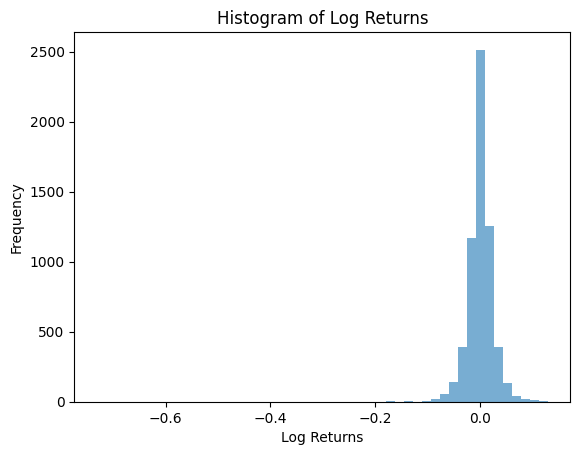

In [14]:
import matplotlib.pyplot as plt

# Plotting the histogram directly using Matplotlib
plt.hist(df['Log_ret'].dropna(), bins=50, alpha=0.6)  # Using dropna() to exclude NaN values
plt.title('Histogram of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

In [15]:
mean_log_ret = df['Log_ret'].mean() * 100
print("Mean of Log Returns:", mean_log_ret)

Mean of Log Returns: 0.09028392204132432


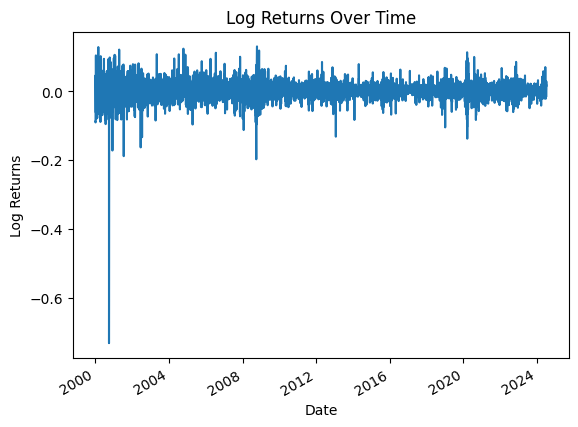

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the log returns using pandas
df['Log_ret'].plot(kind='line')
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.show()

To calculate weekly returns from daily log returns, you can follow these steps:

1. **Assuming [`df['Log_ret']`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FDownloading%20and%20analysing%20financial%20data.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FDownloading%2520and%2520analysing%2520financial%2520data.ipynb%23W5sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FDownloading%20and%20analysing%20financial%20data.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22W5sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A4%2C%22character%22%3A0%7D%5D "/home/edoardo/Desktop/python/Downloading and analysing financial data.ipynb") contains daily log returns**, you can use the `resample()` method provided by pandas to group these log returns into weekly periods. The `sum()` function is then applied to these groups to get the cumulative log return for each week.


Here's how you can do it:



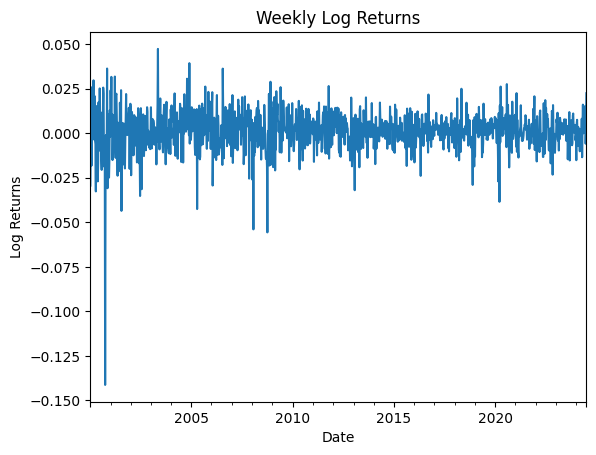

In [17]:
import numpy as np

# Assuming 'Date' is the index and is in datetime format. If not, convert it first.
# df.index = pd.to_datetime(df.index)

# Resample to get weekly log returns
weekly_log_returns = df['Log_ret'].resample('W').mean()

#plot the weekly log returns
weekly_log_returns.plot(kind='line')
plt.title('Weekly Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.show()

To calculate and plot the realized volatility based on the log returns, follow these steps:

1. **Calculate the realized volatility**: Realized volatility is typically calculated as the standard deviation of log returns, often on an annualized basis. To do this, you can use the `std()` method on the log returns, and then multiply by the square root of the number of periods in a year to annualize it. For weekly data, there are approximately 52 weeks in a year.

2. **Plot the realized volatility**: After calculating the realized volatility, you can plot it using matplotlib or any other plotting library you prefer.

Here's how you can do it in Python, assuming you're working with a pandas DataFrame [`df`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FDownloading%20and%20analysing%20financial%20data.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FDownloading%2520and%2520analysing%2520financial%2520data.ipynb%23W5sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FDownloading%20and%20analysing%20financial%20data.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22W5sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A4%2C%22character%22%3A0%7D%5D "/home/edoardo/Desktop/python/Downloading and analysing financial data.ipynb") that contains a column `Log_ret` for log returns:



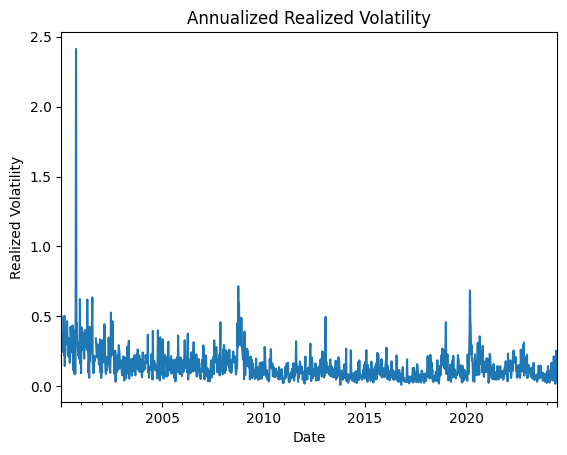

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Log_ret' contains log returns

# Step 1: Calculate weekly realized volatility
# Resample log returns to weekly, calculate standard deviation, and annualize it
weekly_volatility = df['Log_ret'].resample('W').std() * np.sqrt(52)

# Step 2: Plot the realized volatility
weekly_volatility.plot(kind='line')
plt.title('Annualized Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Realized Volatility')
plt.show()



This code snippet assumes that your DataFrame `df` has a datetime index, which is necessary for the `resample` method to work correctly. If the index is not in datetime format, you'll need to convert it using `pd.to_datetime(df.index)` as mentioned in your code comment.

The `.resample("W")` method in pandas is used to resample time-series data. The "W" parameter specifies that the data should be resampled on a weekly basis. Here's a step-by-step explanation of how it works:

1. **Grouping**: The `.resample("W")` method groups the data into one-week intervals. Each group corresponds to all the data points that fall within a specific week.

2. **Time Periods**: The week is considered to start on Monday and end on Sunday by default. The date range for each group is determined based on this convention unless otherwise specified.

3. **Aggregation**: After grouping the data by week, you need to specify an aggregation function to apply to each group. Common functions include `.mean()`, `.sum()`, `.std()`, and so on. In the context of your code, `.std()` is used to calculate the standard deviation of log returns for each week.

4. **Result**: The result is a new time-series data where each data point represents the aggregated value (in this case, standard deviation) for each week.

In your code snippet, [`df['Log_ret'].resample('W').std()`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FDownloading%20and%20analysing%20financial%20data.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FDownloading%2520and%2520analysing%2520financial%2520data.ipynb%23W5sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FDownloading%20and%20analysing%20financial%20data.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22W5sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A4%2C%22character%22%3A0%7D%5D "/home/edoardo/Desktop/python/Downloading and analysing financial data.ipynb") groups the `Log_ret` column of your DataFrame into weekly intervals and calculates the standard deviation of log returns for each week. This is used to estimate the weekly realized volatility of the asset.